# Importing required Packages

In [75]:
# ----------- pip installs ----------- #
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib
# !pip install prettytable
# !pip install scikit-learn
# !pip install scipy

In [76]:
# ----------- imports ----------- #
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from prettytable import PrettyTable
from scipy.stats import chi2_contingency


from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import Normalizer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline


# ----------- global variables ----------- #
seed = 42
np.random.seed(seed)

# Import Data

### Analyse the first dataset

In [77]:
df1 = pd.read_csv('primary_data.csv', delimiter=';')
print(f'{df1.shape=}')
df1.head()

df1.shape=(173, 23)


,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"


In [78]:
df1['class'].value_counts()

class
p    96
e    77
Name: count, dtype: int64

In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   family                173 non-null    object
 1   name                  173 non-null    object
 2   class                 173 non-null    object
 3   cap-diameter          173 non-null    object
 4   cap-shape             173 non-null    object
 5   Cap-surface           133 non-null    object
 6   cap-color             173 non-null    object
 7   does-bruise-or-bleed  173 non-null    object
 8   gill-attachment       145 non-null    object
 9   gill-spacing          102 non-null    object
 10  gill-color            173 non-null    object
 11  stem-height           173 non-null    object
 12  stem-width            173 non-null    object
 13  stem-root             27 non-null     object
 14  stem-surface          65 non-null     object
 15  stem-color            173 non-null    ob

The primary Data only contains a fraction of the data compared to the second dataset. Additionally the features introduced in the first dateset deviate to some extend from the second dataset. Therefore, we decided to focus on the second dataset as it is larger and more recent.

### Data Loading

source: https://mushroom.mathematik.uni-marburg.de/

In [80]:
df = pd.read_csv('secondary_data.csv', delimiter=';')

In [81]:
df.shape

(61069, 21)

# Data Preprocessing

### Missing Values and Data Types

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

We observe some columns with a large fraction of missing values. We will drop these columns if they have less than 6000 non-nan values as they do not provide any useful information. The data types all are reasonable.

In [83]:
df = df.dropna(axis=1, thresh=6000)

In [84]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,w,t,p,NaN,d,w


### Class Imbalance

In [85]:
df['class'].value_counts()

class
p    33888
e    27181
Name: count, dtype: int64

In [86]:
df['class'].value_counts(normalize=True)

class
p    0.554913
e    0.445087
Name: proportion, dtype: float64

The classes are almost equally distributed. Therefore no further refinement is required. 

### Duplicates

In [87]:
dups = pd.DataFrame(df[df.duplicated()])
print(dups.shape)
dups = dups.sort_values('cap-diameter')
dups.head(10)

(146, 20)


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
12978,p,0.72,x,g,y,f,NaN,NaN,y,3.51,0.77,NaN,NaN,y,NaN,f,f,NaN,d,u
9863,p,1.14,x,g,w,f,a,d,w,3.13,1.78,NaN,NaN,e,NaN,f,f,NaN,d,u
57987,p,2.43,o,l,g,f,f,f,f,0.00,0.00,f,f,f,NaN,f,f,NaN,d,w
58197,p,2.44,o,l,g,f,f,f,f,0.00,0.00,f,f,f,NaN,f,f,NaN,d,s
58218,p,2.45,o,l,g,f,f,f,f,0.00,0.00,f,f,f,NaN,f,f,NaN,d,u
58175,p,2.47,o,l,g,f,f,f,f,0.00,0.00,f,f,f,NaN,f,f,NaN,d,w
58109,p,2.53,o,l,g,f,f,f,f,0.00,0.00,f,f,f,NaN,f,f,NaN,d,s
58087,p,2.66,o,l,g,f,f,f,f,0.00,0.00,f,f,f,NaN,f,f,NaN,d,a
58152,p,2.69,o,l,g,f,f,f,f,0.00,0.00,f,f,f,NaN,f,f,NaN,d,w
58042,p,2.70,o,l,g,f,f,f,f,0.00,0.00,f,f,f,NaN,f,f,NaN,d,s


We analysed the found duplicates and decided not to remove then as they still show differences acorss the numerical features. (The pd.duplicated() method considers only object variables.)

### Outliers

In [88]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


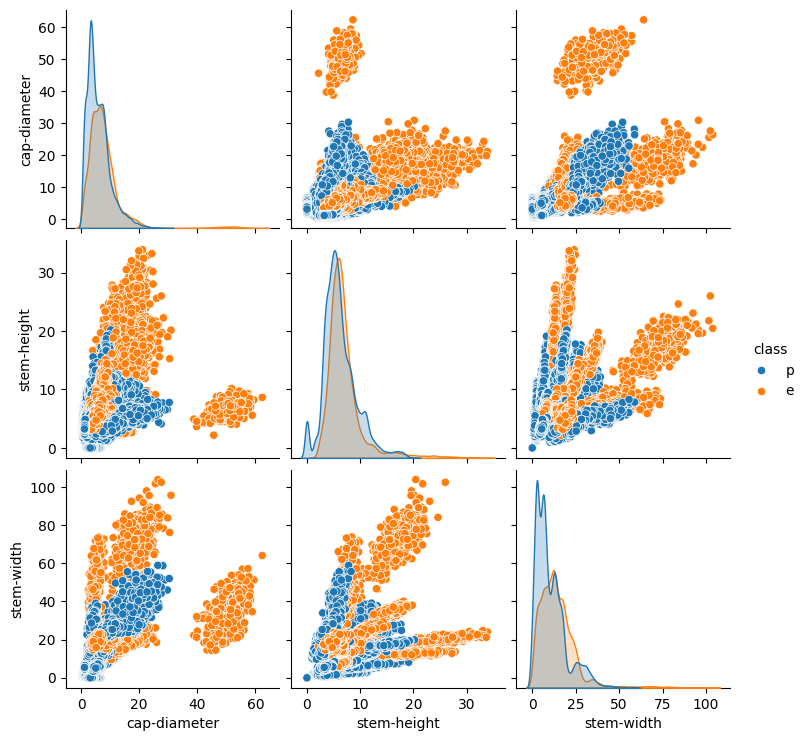

In [89]:
sns.pairplot(df, hue='class');

We observed some outliers in the numerical data and decided to remove datapoints outside the 90% quantile.

In [90]:
df = df[df['stem-width'] < df['stem-width'].quantile(0.95)]
df = df[df['stem-height'] < df['stem-height'].quantile(0.95)]
df = df[df['cap-diameter'] < df['cap-diameter'].quantile(0.95)]

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52348 entries, 353 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 52348 non-null  object 
 1   cap-diameter          52348 non-null  float64
 2   cap-shape             52348 non-null  object 
 3   cap-surface           39284 non-null  object 
 4   cap-color             52348 non-null  object 
 5   does-bruise-or-bleed  52348 non-null  object 
 6   gill-attachment       43390 non-null  object 
 7   gill-spacing          32461 non-null  object 
 8   gill-color            52348 non-null  object 
 9   stem-height           52348 non-null  float64
 10  stem-width            52348 non-null  float64
 11  stem-root             6859 non-null   object 
 12  stem-surface          19740 non-null  object 
 13  stem-color            52348 non-null  object 
 14  veil-color            6142 non-null   object 
 15  has-ring              

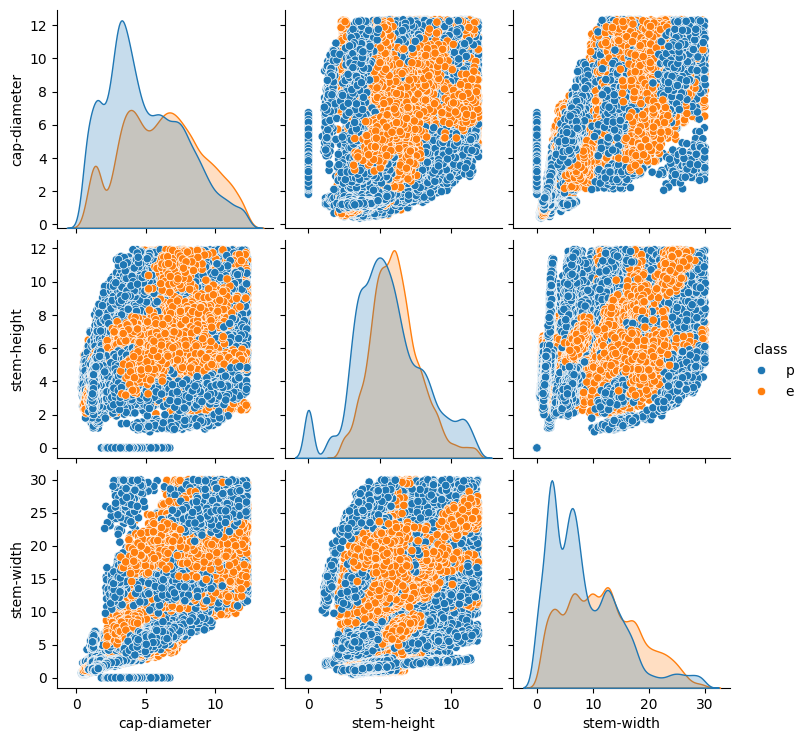

In [92]:
sns.pairplot(df, hue='class');

Now we can see a much more balanced distribution of the measurements. We observed a handful values with a stem-width and height of 0. As there are some mushrooms like mould that do not have a stem, we decided to keep these values.

In [93]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts())
        print('\n')

class
p    29550
e    22798
Name: count, dtype: int64


cap-shape
x    23491
f    11492
s     6205
b     5173
o     2748
c     1690
p     1549
Name: count, dtype: int64


cap-surface
t    6729
s    6502
y    4788
g    4435
h    4386
d    3725
i    2143
w    1895
e    1849
k    1759
l    1073
Name: count, dtype: int64


cap-color
n    20182
y     7924
w     5653
g     3957
e     3476
o     3146
p     1690
u     1689
r     1683
b     1199
k      982
l      767
Name: count, dtype: int64


does-bruise-or-bleed
f    43779
t     8569
Name: count, dtype: int64


gill-attachment
a    11708
d     8833
x     7045
s     5305
p     3823
e     3683
f     2993
Name: count, dtype: int64


gill-spacing
c    22602
d     6866
f     2993
Name: count, dtype: int64


gill-color
w    14736
n     8853
y     7708
p     5495
g     3882
f     2993
o     2631
k     1883
r     1399
u     1005
e      910
b      853
Name: count, dtype: int64


stem-root
b    3049
s    1588
f    1059
r     939
c     224
Name: count,

None of the categorical features show strong outliers towards any of the classes.

In [94]:
df['class'].value_counts(normalize=True)

class
p    0.564491
e    0.435509
Name: proportion, dtype: float64

The modifications did not lead to a significant change in the distribution of the classes.

### Correlation
We encode the class to binary and split the df in numerical and categorical values to look at different types of correlations for different datatypes.

In [95]:
df['class'] = df['class'].map({'p': 1, 'e': 0})

In [96]:
df_num =df[['class' ,'cap-diameter', 'stem-height', 'stem-width']]

In [97]:
df_cat = df.drop(['cap-diameter', 'stem-height', 'stem-width'], axis=1)

For the numerical data we decided for Pearson in order to find linear correlations in data. 

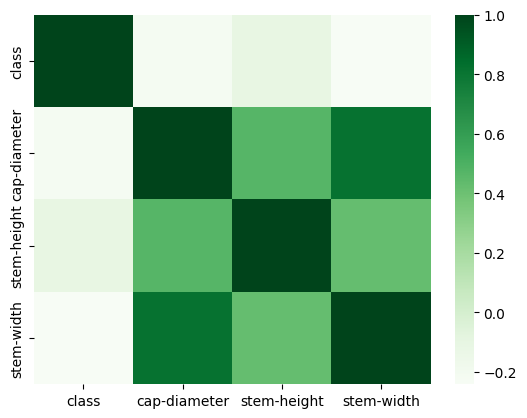

In [98]:
df_corr = df_num
sns.heatmap(df_corr.corr(), cmap='Greens');

The correlation matrix shows strong positive correlations between cap diameter and stem-with: It also shows a moderate positive correlation between stem height and width, and stem-heigth and ca diameter, suggesting, that there is potential for dimensionality reduction in order to lower overfitting and complexity.

For the categorical data we decided to use the Cramérs V in order to find correlations. 

C:\Users\joda\AppData\Local\Temp\ipykernel_25508\454832437.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))
C:\Users\joda\AppData\Local\Temp\ipykernel_25508\454832437.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))
C:\Users\joda\AppData\Local\Temp\ipykernel_25508\454832437.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))
C:\Users\joda\AppData\Local\Temp\ipykernel_25508\454832437.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))


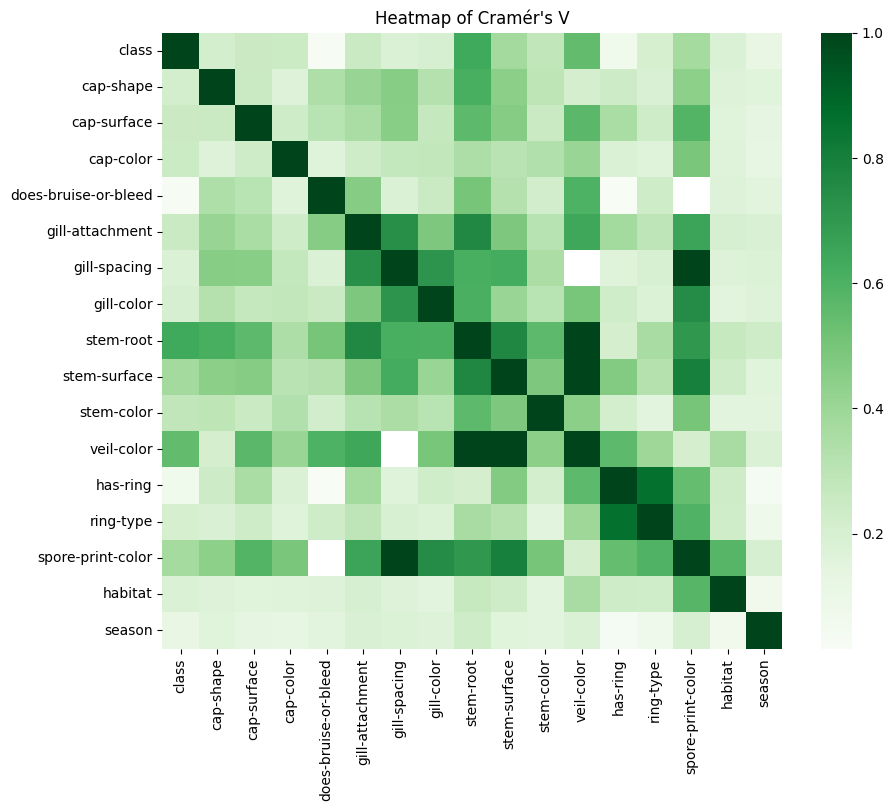

In [99]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

columns = df_cat.columns
cramers = pd.DataFrame(np.zeros((len(columns), len(columns))), columns=columns, index=columns)

for col in columns:
    for row in columns:
        cramers.at[col, row] = cramers_v(df_cat[col], df_cat[row])

plt.figure(figsize=(10, 8))
sns.heatmap(cramers, cmap='Greens')
plt.title("Heatmap of Cramér's V")
plt.show()

The correlation matrix shows moderate to strong positive correlation between several variabel including: spor-print-color - gill-spacing, stem-root - veil-color, stem-sruface - veil-color and several more. 

### One-Hot-Encoding

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52348 entries, 353 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 52348 non-null  int64  
 1   cap-diameter          52348 non-null  float64
 2   cap-shape             52348 non-null  object 
 3   cap-surface           39284 non-null  object 
 4   cap-color             52348 non-null  object 
 5   does-bruise-or-bleed  52348 non-null  object 
 6   gill-attachment       43390 non-null  object 
 7   gill-spacing          32461 non-null  object 
 8   gill-color            52348 non-null  object 
 9   stem-height           52348 non-null  float64
 10  stem-width            52348 non-null  float64
 11  stem-root             6859 non-null   object 
 12  stem-surface          19740 non-null  object 
 13  stem-color            52348 non-null  object 
 14  veil-color            6142 non-null   object 
 15  has-ring              

In [101]:
nominal_columns = df.drop(['class','cap-diameter', 'stem-height', 'stem-width'], axis=1).columns
print(nominal_columns)

Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
       'stem-surface', 'stem-color', 'veil-color', 'has-ring', 'ring-type',
       'spore-print-color', 'habitat', 'season'],
      dtype='object')


In [102]:
df = pd.get_dummies(df, columns=nominal_columns, dtype= int)

In [103]:
df.head()

,class,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
353,1,6.87,6.88,13.64,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
354,1,8.59,9.15,17.34,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
355,1,5.95,7.54,12.73,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
356,1,6.51,6.80,12.92,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
357,1,7.66,8.55,14.98,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Train Test Split

We are using 10% of our data as validation. The remaining data we split 70/30 in training and test data.

In [104]:
df = df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [105]:
X = df.drop('class', axis=1)
y = df['class']

X,X_val, y, y_val = train_test_split(X, y, test_size=0.1, random_state=seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

### Normalizing of Numerical Data

In [106]:
scaler = Normalizer()

numerical = ['cap-diameter', 'stem-height', 'stem-width']
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])
X_val[numerical] = scaler.transform(X_val[numerical])


### Linear Discriminant Analysis

In [107]:
lda = LDA(n_components=1)
lda.fit(X_train, y_train)

X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [108]:
coefficients = lda.coef_[0]
feature_importances = pd.DataFrame(coefficients, index=X_train.columns, columns=['Coefficient'])

print("Feature contributions to the LDA component:")
print(feature_importances.sort_values(by='Coefficient', ascending=False))

Feature contributions to the LDA component:
                   Coefficient
stem-root_c           9.052115
stem-root_r           5.036234
ring-type_p           4.818437
stem-height           4.707035
stem-root_s           4.434942
...                        ...
veil-color_w         -2.301218
veil-color_y         -3.310761
veil-color_k         -3.867137
gill-attachment_p    -4.360209
stem-color_l         -4.367519

[117 rows x 1 columns]


A higher value of a feature with a positive coefficient tends to predict the class labeled as 1, which is the poisonous mushroom. Conversely, a higher value of a feature with a negative coefficient predicts the class labeled as 0, or the edible mushroom.

The characteristics stem-root_c stem-root_r, ring-type_p are the most important characteristics that indicate a poisenous mushroom. They correspond to club and rooted stem roots, and a a pendant ring. These can be regarded as warning characteristics of mushrooms.

Features that indicate an edible mushroom are stem-color_l, gill-attachment_p, and veil-color_k, corresponding to blue stem, gill attachement with pores, and a black veil.

# Model Training

### Logistic Regression using LDA

In [109]:
logReg_lda = LogisticRegression(random_state=seed)
logReg_lda.fit(X_train_lda, y_train)

print(f'Training Accuracy: {logReg_lda.score(X_train_lda, y_train):.2f}')

y_pred = logReg_lda.predict(X_test_lda)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

Training Accuracy: 0.86
Test Accuracy: 0.87


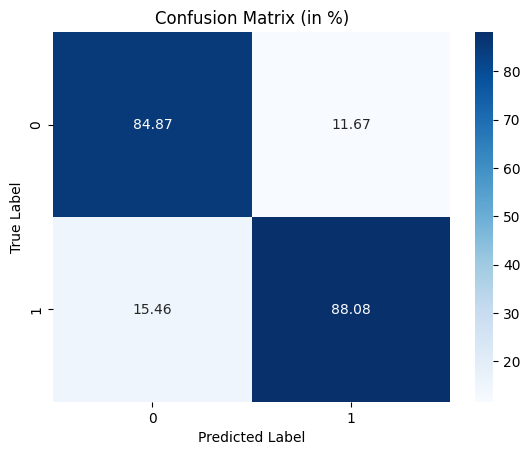

In [110]:
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.astype(float).sum(axis=1) * 100  
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues')  
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (in %)')
plt.show()

Since only two classes are given, only one linear discriminant can be created, reducing the dimensionality of our data to 1. While this works well in logistic regression, it over-simplifies the data for a meaningful use of e.g. MLPs. Valuable non-linear information used in the MLP might get lost. Further, LDA assumes normality and homoscedasticity, which is rarely true. For these reasons we chose to use LDA only in combination with logistic re-gression and will continue our analysis here using PCA.

### Principal Component Analysis

PCA is a technique of feature extraction that maps higher dimensional space to a lower-dimensional feature space. While reducing the number of dimensions, PCA ensures that maximum information of the original dataset is retained in the dataset with the reduced no. of dimensions and the co-relation between the newly obtained Principal Components is minimum.   

We decided to use PCA as dimensionality reduction because we have a correation between some of the variables. Using the lower-dimensional feature space that PCA provides does not only lead to a better performance, but can also reduce overfitting of our models.

Our PCA has four components and an explained variance ratio of 0.83. This means 83% of our variance can be explained with our lower-dimensional feature space. 

In [111]:
X_train.head()

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
38870,0.397004,0.379402,0.835728,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
27806,0.355083,0.371927,0.857663,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
46359,0.334342,0.623309,0.706895,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9383,0.289180,0.499687,0.816510,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
37030,0.527624,0.590898,0.610289,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [112]:
pca = PCA(n_components=4, svd_solver='randomized',random_state=seed)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Logistic Regression

Logistic Regression is a statistical method for binary classification tasks. It etsimates the probability that an instance belongs to a particular class and makes predictions based on a logistic function.

We use this simple model as a baseline to compare our other models against. When we see that our complex models perfome worse than this model we might need to do some further feature engeneering (or collect more data).

In [113]:
logReg_pca = LogisticRegression(random_state=seed)
logReg_pca.fit(X_train_pca, y_train)
print(f'Training Accuracy: {logReg_pca.score(X_train_pca, y_train):.2f}')

y_pred = logReg_pca.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

Training Accuracy: 0.57
Test Accuracy: 0.58


This is just our baseline to compare the other models against. Nevertheless, the accuracy shows, that there are some underlying patterns. For our context the accuracy should be higher as we classify poisinous /edible mushrooms. 

 

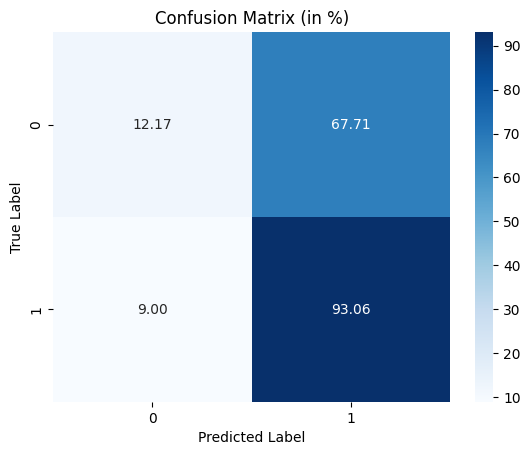

In [114]:
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.astype(float).sum(axis=1) * 100  
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues')  
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (in %)')
plt.show()

In the confusion matrix we can see, that the model is better at predicting class 1 (poisonous) than class 0 (edible).

### Support Vector Machine Model (SVM)

SVM finds the hyperplane that best seperated different classes in the feature space. The goal is to maximize the margin between the nearest data points of any class and the hyperplane. 

SVM is a powerful classification tool, which is offereing high accuracy. We decided to use SVM over Random Forest, because other reseachers already done a random forest on this data (see report). 

In [115]:
svm = SVC(random_state=seed)
svm.fit(X_train_pca, y_train)
print(f'Training Accuracy: {svm.score(X_train_pca, y_train):.2f}')

y_pred = svm.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

Training Accuracy: 0.71
Test Accuracy: 0.71


The accuracy of 0.71 is higher than our baseline of #0.61. SVM seems to be capturing the dataset more effectively. 

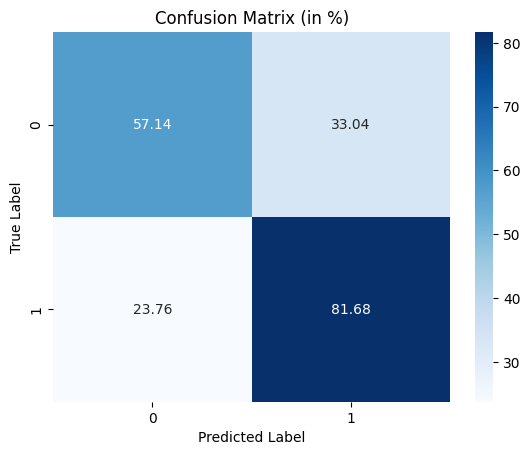

In [116]:
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.astype(float).sum(axis=1) * 100  
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues')  
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (in %)')
plt.show()

In the confusion matrix we can see, that the model is still better at predicting class 1 (poison) than class 0 (edible). Overall it seems to be slightly better than the baseline, but still noct good enough.

### Neural Network

We use a multilayer perceptron neural network as our second complex model to compare with SVM and our baseline. A MLP consits out of min 3 layers, input, at least one hidden, and an output layer. Each node, or neuron, in one layer connects with a certain weight to every node in the following layer, making the network fully connected. 

We chose to use NN because it can be used for clasification and has outperfomred SVMs and other algorithms in a several other applications/reserach.

In [117]:
basic_nn = MLPClassifier(random_state=seed, early_stopping=True)
basic_nn.fit(X_train_pca, y_train)
print(f'Training Accuracy: {basic_nn.score(X_train_pca, y_train):.2f}')

y_pred = basic_nn.predict(X_test_pca)
accuracy_nn = accuracy_score(y_test, y_pred)
print(f' Test Accuracy: {accuracy_nn:.2f}')

Training Accuracy: 0.71
 Test Accuracy: 0.70


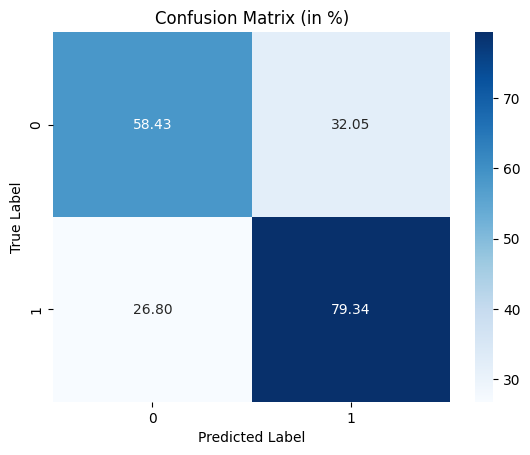

In [118]:
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.astype(float).sum(axis=1) * 100  
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues')  
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (in %)')
plt.show()

We can see that the accuracy of the neural network is even better than the SVM model. Therefore we decided to focus on the Neural Network model to further tune it's hyperparamter to improve the performance of our model.

#### Hyper Parameter Tuning

We are testing a range of 1 to 3 layers with 50 neurons each and 0.001, 0.0025 and 0.005 for the learning rate, best results were obtained by a model with a learning rate of 0.005 and three hidden layers of 50 neurons each.

In [119]:
layer_structure = [(50),(50, 50),(50, 50,50)]
learning_rates = [0.001, 0.0025, 0.005]
columns_to_normalize = ['cap-diameter', 'stem-height', 'stem-width']

preprocessor = ColumnTransformer(
    transformers=[
        ('selected_features', make_pipeline(Normalizer()), columns_to_normalize),
        ('remaining_features', 'passthrough', [col for col in X.columns if col not in columns_to_normalize])
    ]
)

basic_nn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=4)),
    ('mlp', MLPClassifier(random_state=seed, early_stopping=True))
])

param_grid = {
    'mlp__hidden_layer_sizes': layer_structure,
    'mlp__learning_rate_init': learning_rates
}


grid = GridSearchCV(basic_nn_pipe,param_grid,cv=3, scoring = 'accuracy',return_train_score= True, verbose = 3)

grid.fit(X,y)

results = grid.cv_results_
for mean_score, params in zip(results['mean_test_score'],results['params']):
    print(f'Params {params}, Mean Test Accuracy: {mean_score: .4f}')

print(f'Best hyperparameters: {grid.best_params_}')

best_model = grid.best_estimator_
print(f'{grid.cv_results_=}')

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001;, score=(train=0.670, test=0.663) total time=   3.5s
[CV 2/3] END mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001;, score=(train=0.675, test=0.673) total time=   7.9s
[CV 3/3] END mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001;, score=(train=0.667, test=0.664) total time=   5.5s
[CV 1/3] END mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.0025;, score=(train=0.693, test=0.686) total time=   5.7s
[CV 2/3] END mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.0025;, score=(train=0.688, test=0.689) total time=   3.3s
[CV 3/3] END mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.0025;, score=(train=0.669, test=0.666) total time=   2.5s
[CV 1/3] END mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.005;, score=(train=0.756, test=0.744) total time=   9.6s
[CV 2/3] END mlp__hidden_layer_sizes=(50,), mlp_

This model is again slightly better than the baseline model and SVM. As we still see room for improvement (espacially because eating a poisinous mushroom could become deadly) we will do a hyper-parameter optimization for this model. 

In [120]:
adapted_nn = MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate_init = 0.005,random_state=seed, early_stopping=True)
adapted_nn.fit(X_train_pca, y_train)
print(f'Training Accuracy: {adapted_nn.score(X_train_pca, y_train):.2f}')

y_pred = adapted_nn.predict(X_test_pca)
accuracy_nn = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy_nn:.2f}')

Training Accuracy: 0.95
Test Accuracy: 0.94


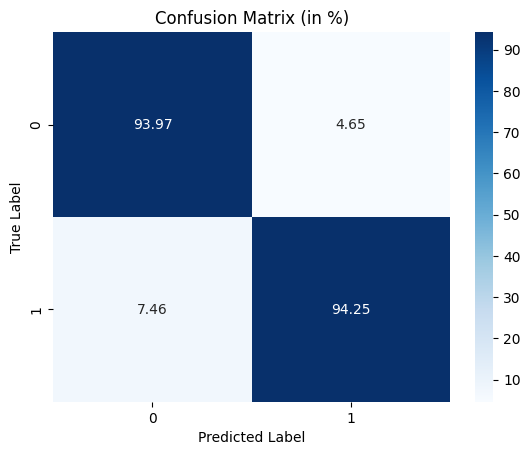

In [121]:
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.astype(float).sum(axis=1) * 100  
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues')  
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (in %)')
plt.show()

The confusion matrix shows a very good outcome.

### Cross Validation

In order to prove that our accuracy is statistical significantly better we are doing a cross validation. This also would show if our models are overfitting. 

In [122]:
folds = 5
scoring = ['accuracy', 'precision_macro', 'recall_macro']
pca_components = 4

columns_to_normalize = ['cap-diameter', 'stem-height', 'stem-width']

normalizer = ColumnTransformer(
    transformers=[
        ('selected_features', make_pipeline(Normalizer()), columns_to_normalize),
        ('remaining_features', 'passthrough', [col for col in X.columns if col not in columns_to_normalize])
    ]
)

In [123]:
lda_regression_pipe = make_pipeline(normalizer,  
                     LDA(n_components=1), 
                     logReg_lda
                     
                     )  

lda_reg_scores = cross_validate(lda_regression_pipe, X, y, cv=folds,scoring=scoring)  
print("LDA Regression Accuracy:", lda_reg_scores)

LDA Regression Accuracy: {'fit_time': array([2.72731686, 1.07878613, 1.10569096, 2.22026944, 1.79017258]), 'score_time': array([0.01942921, 0.02438879, 0.02666736, 0.02180767, 0.02526522]), 'test_accuracy': array([0.86416216, 0.86723973, 0.86660299, 0.86351093, 0.85990236]), 'test_precision_macro': array([0.86162106, 0.8649216 , 0.86450946, 0.86101945, 0.85741315]), 'test_recall_macro': array([0.86294995, 0.86552022, 0.86432986, 0.86210083, 0.85827126])}


In [124]:
pca_regression_pipe = make_pipeline(normalizer,  
                     PCA(n_components=pca_components), 
                     logReg_pca)  

pca_reg_scores = cross_validate(pca_regression_pipe, X, y, cv=folds,scoring=scoring)  
print("PCA Regression Accuracy:", pca_reg_scores)

PCA Regression Accuracy: {'fit_time': array([0.39951015, 0.34458113, 0.45747375, 0.3697331 , 0.40640211]), 'score_time': array([0.02960777, 0.02171111, 0.0309763 , 0.02938819, 0.0264852 ]), 'test_accuracy': array([0.56722912, 0.56436379, 0.56818423, 0.57482488, 0.56474209]), 'test_precision_macro': array([0.54661089, 0.53884433, 0.54976951, 0.57328085, 0.53996021]), 'test_recall_macro': array([0.51746243, 0.51239108, 0.5176315 , 0.52272113, 0.51534031])}


In [125]:
svm_regression_pipe = make_pipeline(normalizer,  
                     PCA(n_components=pca_components), 
                     SVC(random_state=seed))  
  
svm_scores = cross_validate(svm_regression_pipe, X, y, cv=folds,scoring=scoring)  
print("SVM Accuracy:", svm_scores)

SVM Accuracy: {'fit_time': array([23.69683051, 25.57972264, 23.58275294, 24.91287923, 27.69625783]), 'score_time': array([13.68909478, 13.33661866, 12.99606848, 13.23539543, 16.01534224]), 'test_accuracy': array([0.70964661, 0.70996498, 0.71495278, 0.72479304, 0.71906177]), 'test_precision_macro': array([0.70888931, 0.70800236, 0.71315659, 0.72338651, 0.71867088]), 'test_recall_macro': array([0.69453268, 0.69622814, 0.70155445, 0.71195944, 0.70458837])}


In [126]:
basic_nn_pipe = make_pipeline(
    normalizer,
    PCA(n_components=pca_components),
    MLPClassifier(random_state=seed, early_stopping=True)
)
basic_nn_scores = cross_validate(basic_nn_pipe, X, y, cv=folds,scoring=scoring)  
print("Basic NN Accuracy:", basic_nn_scores)

Basic NN Accuracy: {'fit_time': array([18.12399316,  8.64609504, 17.22534251, 11.3647337 , 14.14459848]), 'score_time': array([0.03443909, 0.02545834, 0.02446246, 0.0275867 , 0.02417278]), 'test_accuracy': array([0.70179348, 0.68226679, 0.70593229, 0.71492252, 0.70388453]), 'test_precision_macro': array([0.70293992, 0.68161295, 0.70454768, 0.71488509, 0.70662494]), 'test_recall_macro': array([0.68408069, 0.66369581, 0.6910709 , 0.69969016, 0.6852165 ])}


In [127]:
adapted_nn_pipe = make_pipeline(normalizer,  
                     PCA(n_components=pca_components), 
                     MLPClassifier(hidden_layer_sizes=(50, 50), learning_rate_init = 0.0025,random_state=seed, early_stopping=True))

adapted_nn_scores = cross_validate(adapted_nn_pipe, X, y, cv=folds,scoring=scoring)  
print("Adapted NN Accuracy:", adapted_nn_scores)

Adapted NN Accuracy: {'fit_time': array([129.42830038,  33.95573568,  39.56895447, 110.4315083 ,
       100.14974904]), 'score_time': array([0.19178414, 0.02521253, 0.03367186, 0.19184113, 0.1038835 ]), 'test_accuracy': array([0.90172981, 0.86140295, 0.85768863, 0.88834642, 0.89312248]), 'test_precision_macro': array([0.9014741 , 0.8605747 , 0.86110718, 0.88809915, 0.89290514]), 'test_recall_macro': array([0.89843376, 0.85696766, 0.84951227, 0.88448545, 0.88943342])}


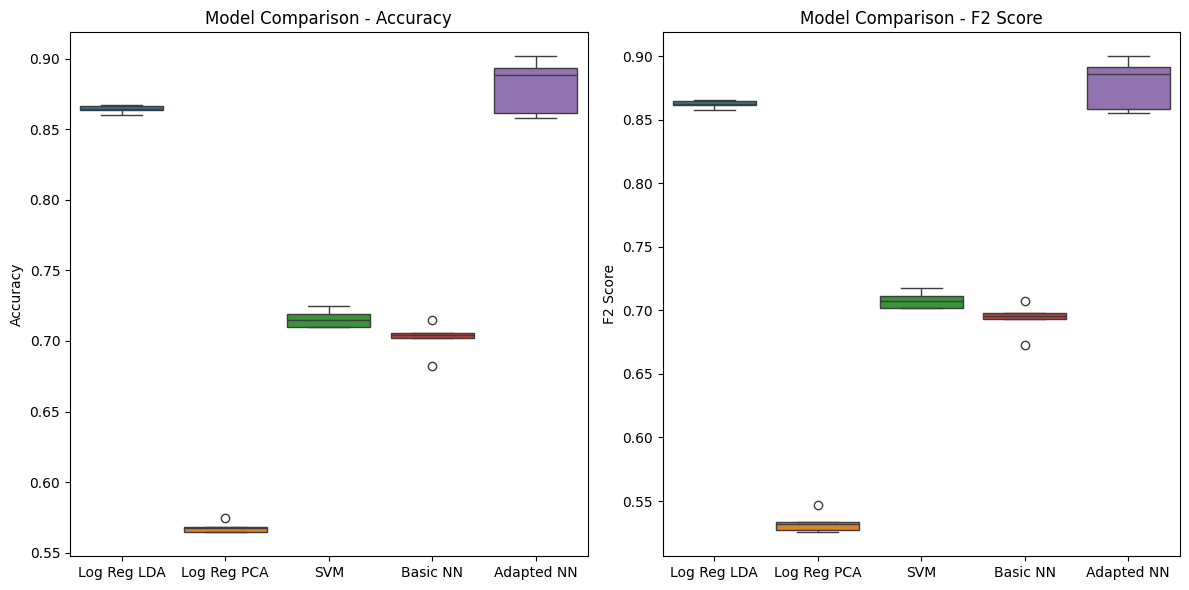

In [128]:
accuracy_scores = pd.DataFrame({
    'Log Reg LDA': lda_reg_scores['test_accuracy'],
    'Log Reg PCA': pca_reg_scores['test_accuracy'],
    'SVM': svm_scores['test_accuracy'],
    'Basic NN': basic_nn_scores['test_accuracy'],
    'Adapted NN': adapted_nn_scores['test_accuracy']
})

f2_scores = pd.DataFrame({
    'Log Reg LDA': 2 * (lda_reg_scores['test_precision_macro'] * lda_reg_scores['test_recall_macro']) / (lda_reg_scores['test_precision_macro'] + lda_reg_scores['test_recall_macro']),
    'Log Reg PCA': 2 * (pca_reg_scores['test_precision_macro'] * pca_reg_scores['test_recall_macro']) / (pca_reg_scores['test_precision_macro'] + pca_reg_scores['test_recall_macro']),
    'SVM': 2 * (svm_scores['test_precision_macro'] * svm_scores['test_recall_macro']) / (svm_scores['test_precision_macro'] + svm_scores['test_recall_macro']),
    'Basic NN': 2 * (basic_nn_scores['test_precision_macro'] * basic_nn_scores['test_recall_macro']) / (basic_nn_scores['test_precision_macro'] + basic_nn_scores['test_recall_macro']),
    'Adapted NN': 2 * (adapted_nn_scores['test_precision_macro'] * adapted_nn_scores['test_recall_macro']) / (adapted_nn_scores['test_precision_macro'] + adapted_nn_scores['test_recall_macro'])
})

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=accuracy_scores, ax=axs[0])
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Comparison - Accuracy')

sns.boxplot(data=f2_scores, ax=axs[1])
axs[1].set_ylabel('F2 Score')
axs[1].set_title('Model Comparison - F2 Score')

plt.tight_layout()
plt.show()



In [136]:
f2_scores.describe()

,Log Reg LDA,Log Reg PCA,SVM,Basic NN,Adapted NN
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.862265,0.532867,0.708040,0.693325,0.878289
std,0.002891,0.008434,0.006737,0.012751,0.020062
min,0.857842,0.525285,0.701638,0.672535,0.855270
25%,0.861560,0.527363,0.702066,0.693382,0.858767
50%,0.862285,0.531637,0.707308,0.695756,0.886289
75%,0.864420,0.533217,0.711560,0.697744,0.891166
max,0.865221,0.546835,0.717627,0.707206,0.899951


In [137]:
accuracy_scores.describe()

,Log Reg LDA,Log Reg PCA,SVM,Basic NN,Adapted NN
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.864284,0.567869,0.715684,0.701760,0.880458
std,0.002912,0.004212,0.006405,0.011991,0.019727
min,0.859902,0.564364,0.709647,0.682267,0.857689
25%,0.863511,0.564742,0.709965,0.701793,0.861403
50%,0.864162,0.567229,0.714953,0.703885,0.888346
75%,0.866603,0.568184,0.719062,0.705932,0.893122
max,0.867240,0.574825,0.724793,0.714923,0.901730


We can see that all our models are considerably better than our baseline. It can also be observed that the hyperparameter tuning shows significantly better results than the basic neural network.

In [129]:
logistic_regression_lda_df = pd.DataFrame({ 'Accuracy': accuracy_scores['Log Reg LDA'], 'F2 Score': f2_scores['Log Reg LDA'] })
logistic_regression_pca_df = pd.DataFrame({ 'Accuracy': accuracy_scores['Log Reg PCA'], 'F2 Score': f2_scores['Log Reg PCA'] })
svm_df = pd.DataFrame({ 'Accuracy': accuracy_scores['SVM'], 'F2 Score': f2_scores['SVM'] })
neural_network_df = pd.DataFrame({ 'Accuracy': accuracy_scores['Basic NN'], 'F2 Score': f2_scores['Basic NN'] })
optimal_neural_network_df = pd.DataFrame({ 'Accuracy': accuracy_scores['Adapted NN'], 'F2 Score': f2_scores['Adapted NN'] })

In [130]:
def print_table(df, title, filename):
    table = PrettyTable()
    table.title = title
    table.field_names = df.columns.tolist()
    for index, row in df.iterrows():
        table.add_row(row)
    print(table)

print_table(logistic_regression_lda_df, "Logistic Regression with LDA Performance", "logistic_regression__lda_performance.txt")
print_table(logistic_regression_pca_df, "Logistic Regression with PCA Performance", "logistic_regression__pca_performance.txt")
print_table(svm_df, "SVM Performance", "svm_performance.txt")
print_table(neural_network_df, "Neural Network Performance", "neural_network_performance.txt")
print_table(optimal_neural_network_df, "Optimal Neural Network Performance", "optimal_neural_network_performance.txt")

+------------------------------------------+
| Logistic Regression with LDA Performance |
+--------------------+---------------------+
|      Accuracy      |       F2 Score      |
+--------------------+---------------------+
| 0.8641621564257668 |  0.8622849935188863 |
| 0.8672397325692455 |  0.8652208058688388 |
| 0.8666029926774912 |  0.8644196525827785 |
| 0.8635109318616006 |  0.8615598022132239 |
| 0.859902356187646  |  0.8578419899208473 |
+--------------------+---------------------+
+------------------------------------------+
| Logistic Regression with PCA Performance |
+--------------------+---------------------+
|      Accuracy      |       F2 Score      |
+--------------------+---------------------+
| 0.5672291202377162 |  0.5316374204146552 |
| 0.5643637907248222 |  0.5252848733718064 |
| 0.5681842300753476 |  0.5332166879513208 |
| 0.5748248779452345 |  0.5468348041663161 |
| 0.5647420929738909 |  0.5273630717372927 |
+--------------------+---------------------+
+---------

### Test with unseen Validation Data

We first transform the data in the same way we transformed the Training Data. We do this for LDA and PCA

In [131]:
X_val_lda = lda.transform(X_val)
X_val_pca = pca.transform(X_val)

#### Logistic Regession with LDA

In [132]:
y_pred = logReg_lda.predict(X_val_lda)

accuracy = accuracy_score(y_val, y_pred)
print(f'Logistic Regession with LDA Validation Accuracy: {accuracy:.2f}')

Logistic Regession with LDA Validation Accuracy: 0.87


Our validation set has a similar accuracy as our test set, validating out results.

#### Logistic Regession with PCA

In [133]:
y_pred = logReg_pca.predict(X_val_pca)

accuracy = accuracy_score(y_val, y_pred)
print(f'Logistic Regession with PCA Validation Accuracy: {accuracy:.2f}')

Logistic Regession with PCA Validation Accuracy: 0.58


Our validation set has a similar accuracy as our test set, validating out results.

#### SVM

In [134]:
y_pred = svm.predict(X_val_pca)

accuracy = accuracy_score(y_val, y_pred)
print(f'SVM Validation Accuracy: {accuracy:.2f}')

SVM Validation Accuracy: 0.71


Our validation set has a similar accuracy as our test set, validating out results.

#### Neural Network

In [135]:
y_pred = adapted_nn.predict(X_val_pca)

accuracy = accuracy_score(y_val, y_pred)
print(f'Adapted Neural Network Validation Accuracy: {accuracy:.2f}')

Adapted Neural Network Validation Accuracy: 0.94


Our validation set has a similar accuracy as our test set, validating out results.